In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sn

In [2]:
sn.load_dataset('titanic').head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
sn.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
sn.load_dataset('tips').head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df=sn.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score

In [8]:
df.isna().sum().sum()

869

In [9]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

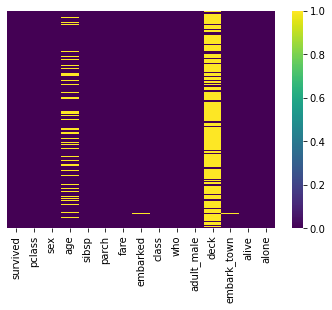

In [10]:
sn.heatmap(df.isna(),yticklabels=False,cmap='viridis')

In [11]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

<AxesSubplot:xlabel='survived', ylabel='age'>

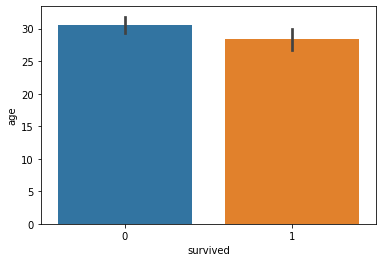

In [12]:
sn.barplot(x='survived',y='age',data=df)

<AxesSubplot:xlabel='survived', ylabel='count'>

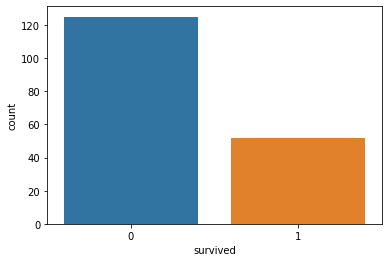

In [13]:
import warnings
warnings.filterwarnings('ignore')

sn.countplot(df[df.age.isna()].survived)

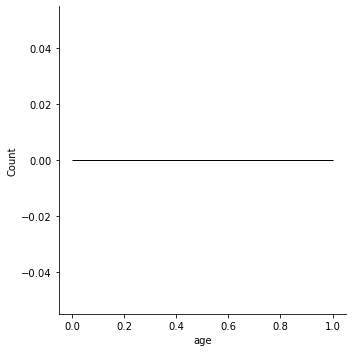

In [14]:
sn.displot(df[df.age.isnull()].age)

In [15]:
df['age'].fillna(df.age.median(),inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
df.isna().sum().sum()

692

<AxesSubplot:xlabel='deck', ylabel='count'>

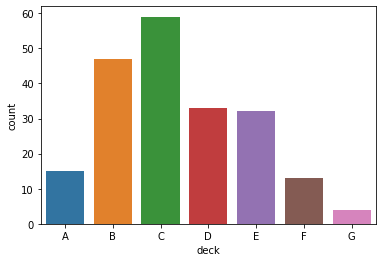

In [17]:
sn.countplot(df.deck)

In [18]:
df.shape

(891, 15)

In [19]:
df.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [20]:
df.isna().sum()/len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age             0.000000
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [21]:
df.drop('deck',axis=1,inplace=True)

<AxesSubplot:xlabel='embarked', ylabel='count'>

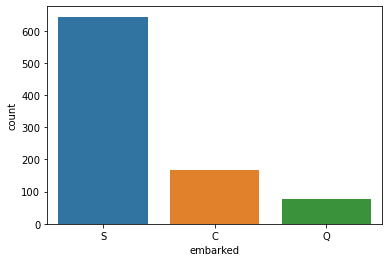

In [22]:
sn.countplot(df.embarked)

In [23]:
df['embarked'].fillna(df.embarked.mode()[0],inplace=True)

In [24]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [26]:
df.select_dtypes('object').head()

,sex,embarked,who,embark_town,alive
0,male,S,man,Southampton,no
1,female,C,woman,Cherbourg,yes
2,female,S,woman,Southampton,yes
3,female,S,woman,Southampton,yes
4,male,S,man,Southampton,no


In [27]:
df1=pd.get_dummies(data=df,columns=['sex','embarked','who','embark_town','alive'],drop_first=True)
df1

,survived,pclass,age,sibsp,parch,fare,class,adult_male,alone,sex_male,embarked_Q,embarked_S,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,0,3,22.0,1,0,7.2500,Third,True,False,1,0,1,1,0,0,1,0
1,1,1,38.0,1,0,71.2833,First,False,False,0,0,0,0,1,0,0,1
2,1,3,26.0,0,0,7.9250,Third,False,True,0,0,1,0,1,0,1,1
3,1,1,35.0,1,0,53.1000,First,False,False,0,0,1,0,1,0,1,1
4,0,3,35.0,0,0,8.0500,Third,True,True,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,Second,True,True,1,0,1,1,0,0,1,0
887,1,1,19.0,0,0,30.0000,First,False,True,0,0,1,0,1,0,1,1
888,0,3,28.0,1,2,23.4500,Third,False,False,0,0,1,0,1,0,1,0
889,1,1,26.0,0,0,30.0000,First,True,True,1,0,0,1,0,0,0,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [29]:
df.adult_male.astype('int')

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: adult_male, Length: 891, dtype: int32

In [30]:
df.adult_male=df.adult_male.astype('int')
df.alone=df.alone.astype('int')
df['class'].nunique()

3

In [31]:
x=df1.drop(['survived','class'],axis=1)
y=df1['survived']

In [32]:
x.head()

,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,3,22.0,1,0,7.2500,True,False,1,0,1,1,0,0,1,0
1,1,38.0,1,0,71.2833,False,False,0,0,0,0,1,0,0,1
2,3,26.0,0,0,7.9250,False,True,0,0,1,0,1,0,1,1
3,1,35.0,1,0,53.1000,False,False,0,0,1,0,1,0,1,1
4,3,35.0,0,0,8.0500,True,True,1,0,1,1,0,0,1,0


In [33]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [35]:
scaler=MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

<AxesSubplot:xlabel='survived', ylabel='count'>

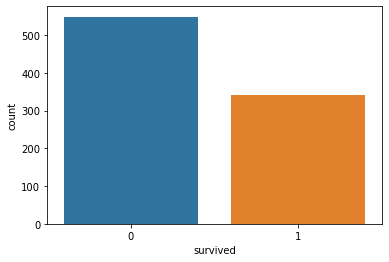

In [36]:
sn.countplot(df.survived)

In [37]:
df.survived.value_counts()/len(df)

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [38]:
knn=KNeighborsClassifier(n_neighbors=7)

In [39]:
cross_val_score(knn,x,y,cv=10,scoring='accuracy',n_jobs=1)

array([0.7       , 0.73033708, 0.74157303, 0.83146067, 0.76404494,
       0.73033708, 0.79775281, 0.76404494, 0.82022472, 0.82022472])

In [40]:
error_rate=[]

In [41]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [42]:
error_rate=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))

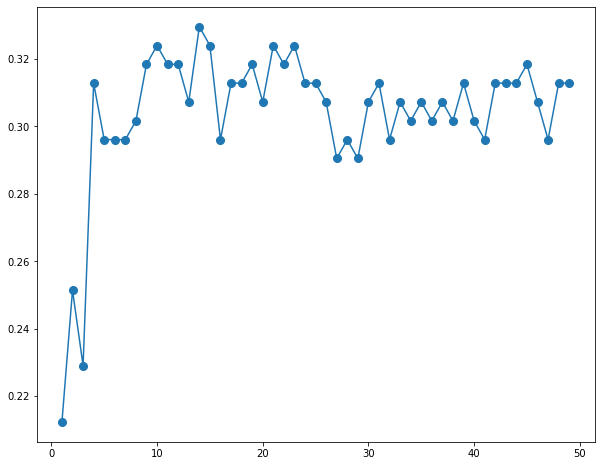

In [43]:
pt.figure(figsize=(10,8))
pt.plot(range(1,50),error_rate,marker='o',markersize=8)

In [44]:
knn.score(x_test,y_test)

0.6871508379888268

In [45]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, knn.predict(x_test)) 
cm

array([[87, 13],
       [43, 36]], dtype=int64)

In [46]:
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,knn.predict(x_test))
accuracy

0.6871508379888268

In [47]:
r2=metrics.r2_score(y_test,knn.predict(x_test))
r2

-0.26886075949367094

In [48]:
precision=metrics.precision_score(knn.predict(x_test),y_test)
precision

0.45569620253164556

In [49]:
recall=metrics.recall_score(knn.predict(x_test),y_test)
recall

0.7346938775510204

In [50]:
mae=metrics.mean_absolute_error(knn.predict(x_test),y_test)
mae

0.3128491620111732

In [51]:
mse=metrics.mean_squared_error(knn.predict(x_test),y_test)
mse

0.3128491620111732

In [70]:
knn.fit(x_test,y_test)

KNeighborsClassifier(n_neighbors=3)

In [71]:
knn.score(x_test,y_test)

0.8491620111731844

In [54]:
KNeighborsClassifier(n_neighbors=27)

KNeighborsClassifier(n_neighbors=27)

In [56]:
rand_cv=RandomizedSearchCV(knn,param_distributions={'n_neighbors':[3,27,29]},scoring='accuracy')

In [57]:
rand_cv.fit(x,y)

RandomizedSearchCV(estimator=KNeighborsClassifier(n_neighbors=49),
                   param_distributions={'n_neighbors': [3, 27, 29]},
                   scoring='accuracy')

In [58]:
rand_cv.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [59]:
rand_cv.best_score_

0.7766995166656205

In [60]:
knn.set_params(**rand_cv.best_params_)

KNeighborsClassifier(n_neighbors=3)

In [61]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [62]:
accuracy_score(y_test,knn.predict(x_test))

0.770949720670391

In [63]:
precision_score(knn.predict(x_test),y_test)

0.759493670886076

In [64]:
recall_score(knn.predict(x_test),y_test)

0.7317073170731707

In [67]:
metrics.confusion_matrix(y_test,knn.predict(x_test))

array([[78, 22],
       [19, 60]], dtype=int64)

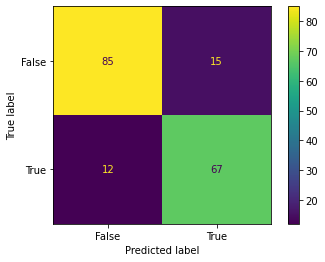

In [72]:
#confusion matrix
from sklearn import metrics
import matplotlib.pyplot as pt
cm=metrics.confusion_matrix(y_test,knn.predict(x_test))
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cm_display.plot()
pt.show()